In [5]:
# Import the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Instantiate a tokenizer object
tokenizer = Tokenizer()

In [7]:
# Data preprocessing
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
corpus = data.lower().split('\n')

In [11]:
# Generate word_index
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
total_words = len(word_index) + 1 # Account for the unknown token
print(total_words)

input_sequences = []

# Process every sentence, make a n-gram input and output sequence
for sentence in corpus:
    sequence = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1,len(sequence)):
        curr_seq = sequence[:i+1]
        input_sequences.append(curr_seq)
print(input_sequences[0])

# Get the max length of any sequence: Needed while specifying the input length to the model
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)

# Pad the sequence
input_sequences = pad_sequences(input_sequences,maxlen = max_sequence_len,padding = 'pre')

# Get the input sequence and output token, Last token in the input sequence is the output sequence
x_train = input_sequences[:,:-1]
labels = input_sequences[:,-1]
print(x_train[1],labels[1])
y_train = tf.keras.utils.to_categorical(labels,num_classes = total_words)

263
[4, 2]
11
[0 0 0 0 0 0 0 0 4 2] 66


In [18]:
# Define the model
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(total_words,64,input_length=max_sequence_len-1),
                                   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
                                   tf.keras.layers.Dense(32,activation='relu'),
                                   tf.keras.layers.Dense(total_words,activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 64)            16832     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40)                13600     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1312      
_________________________________________________________________
dense_2 (Dense)              (None, 263)               8679      
Total params: 40,423
Trainable params: 40,423
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=500, verbose=1)

Epoch 1/500
15/15 [==============================] - 4s 9ms/step - loss: 5.5712 - accuracy: 0.0055
Epoch 2/500
15/15 [==============================] - 0s 8ms/step - loss: 5.5582 - accuracy: 0.0447
Epoch 3/500
15/15 [==============================] - 0s 8ms/step - loss: 5.5337 - accuracy: 0.0486
Epoch 4/500
15/15 [==============================] - 0s 8ms/step - loss: 5.4343 - accuracy: 0.0495
Epoch 5/500
15/15 [==============================] - 0s 8ms/step - loss: 5.2599 - accuracy: 0.0523
Epoch 6/500
15/15 [==============================] - 0s 8ms/step - loss: 5.0805 - accuracy: 0.0586
Epoch 7/500
15/15 [==============================] - 0s 8ms/step - loss: 5.0342 - accuracy: 0.0516
Epoch 8/500
15/15 [==============================] - 0s 8ms/step - loss: 4.9582 - accuracy: 0.0373
Epoch 9/500
15/15 [==============================] - 0s 8ms/step - loss: 4.9623 - accuracy: 0.0378
Epoch 10/500
15/15 [==============================] - 0s 9ms/step - loss: 4.8871 - accuracy: 0.0572
Epoch 11/

In [20]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

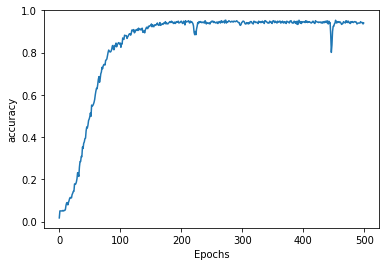

In [21]:
# PLot accuracy graph
plot_graphs(history,'accuracy')

In [22]:
# Generate Predictions
seed_text = "Laurence went to dublin and"
num_length = 100
for i in range(num_length):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list],padding = 'pre',maxlen= max_sequence_len-1)
  predicted = model.predict_classes(token_list)
  output_word = ""
  for word,idx in tokenizer.word_index.items():
    if(idx==predicted):
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Laurence went to dublin and declared she was painted painted painted painted a your call glisten call call call call call cask a eyes ask ask eyes glisten eyes glisten eyes glisten glisten hall glisten glisten i hall i hall jig fall fall hall fall hearty a eyes hall hall hall eyes glisten eyes glisten eyes glisten i hall glisten glisten i hall i hall jig fall fall hall fall hearty a eyes hall hall hall eyes glisten eyes glisten eyes glisten i hall glisten glisten i hall i hall jig fall fall hall fall hearty a eyes hall hall hall eyes glisten eyes glisten
